# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


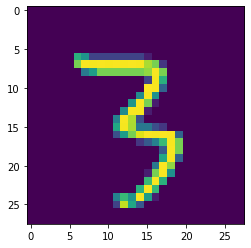

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[44])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(filters = 16, kernel_size = (3,3), activation='relu'))
model.add(Convolution2D(filters = 16, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Convolution2D(10, 26))
model.add(Convolution2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(Convolution2D(filters = 16, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
#model.add(Activation('softmax'))
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 16)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [59]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/25
60000/60000 [==============================] - 21s 342us/step - loss: 0.1873 - acc: 0.9412
Epoch 2/25
60000/60000 [==============================] - 20s 331us/step - loss: 0.0645 - acc: 0.9804
Epoch 3/25
60000/60000 [==============================] - 20s 329us/step - loss: 0.0479 - acc: 0.9846
Epoch 4/25
60000/60000 [==============================] - 20s 329us/step - loss: 0.0398 - acc: 0.9881
Epoch 5/25
60000/60000 [==============================] - 20s 335us/step - loss: 0.0332 - acc: 0.9894
Epoch 6/25
60000/60000 [==============================] - 20s 328us/step - loss: 0.0281 - acc: 0.9909
Epoch 7/25
60000/60000 [==============================] - 20s 328us/step - loss: 0.0257 - acc: 0.9920
Epoch 8/25
60000/60000 [==============================] - 20s 328us/step - loss: 0.0242 - acc: 0.9920
Epoch 9/25
60000/60000 [==============================] - 20s 329us/step - loss: 0.0202 - acc: 0.9934
Epoch 10/25
60000/60000 [==============================] - 20s 326us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [61]:
print(score)

[0.04393368519448459, 0.9908]


In [0]:
y_pred = model.predict(X_test)

In [63]:
print(y_pred[:9])
print(y_test[:9])

[[1.39672155e-18 4.13583488e-15 2.88608200e-12 3.35417424e-14
  2.53274432e-20 3.94619647e-17 7.23388686e-27 1.00000000e+00
  2.36369941e-18 1.77653535e-15]
 [6.33618505e-12 5.75935480e-12 1.00000000e+00 2.87011138e-13
  2.14211859e-22 2.63010063e-22 3.82793743e-17 1.42234815e-17
  3.30490870e-13 6.40264409e-25]
 [7.15534403e-12 9.99996781e-01 2.69778599e-09 2.47413223e-12
  1.27750468e-06 1.14854480e-10 1.57028793e-10 1.94568565e-06
  1.77644355e-09 1.51641533e-09]
 [1.00000000e+00 5.96777595e-20 2.01530365e-14 2.11419400e-20
  1.40642579e-14 9.58506392e-19 4.01489009e-13 2.24186518e-15
  1.48112049e-16 1.02234800e-12]
 [5.49143073e-17 1.48760873e-17 1.68744276e-19 1.15590041e-20
  1.00000000e+00 3.10870770e-18 1.93593433e-17 8.72286901e-20
  1.17265655e-14 1.06526376e-12]
 [1.16673340e-13 9.99997735e-01 4.02553768e-10 1.80041488e-13
  2.83984547e-09 3.55899909e-15 1.99169108e-14 2.23188454e-06
  1.75028797e-10 1.35148892e-10]
 [1.82492861e-20 1.34045921e-12 9.16744950e-17 5.71382039e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

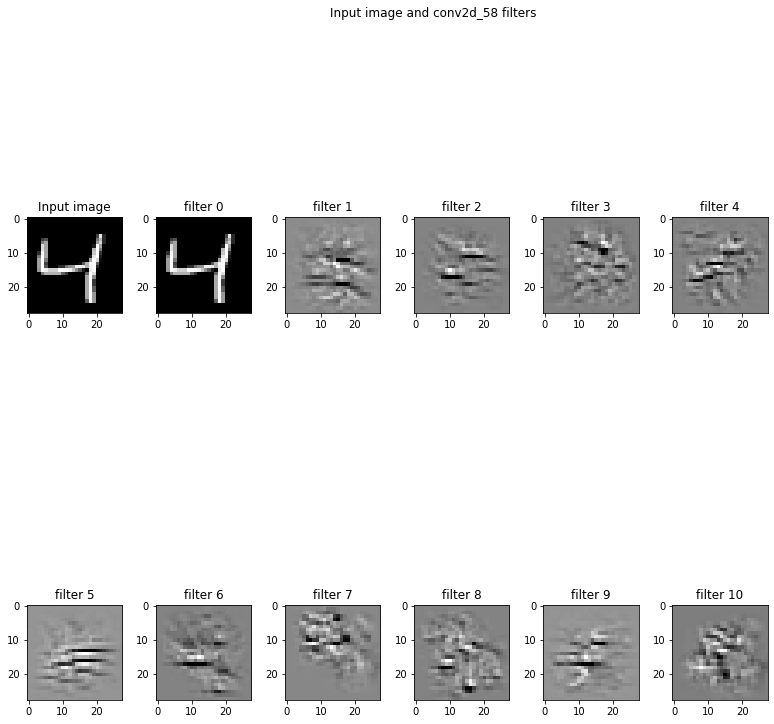

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_58'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()